# GPU vs CPU on PolyACO


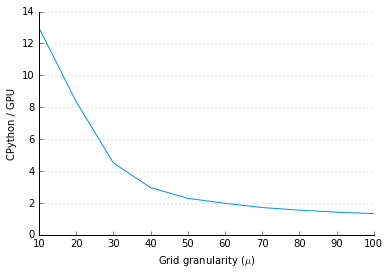

In [26]:
%matplotlib inline
import matplotlib
import numpy as np
import pickle
from matplotlib import pyplot as plt

from acoc import acoc_plotter 


fig, ax = plt.subplots()

d = pickle.load(open('/Users/torrytufteland/Dropbox/Guro og Torry/experiments/Guro/experiments_tests/gpu_cpu_preformanceSpeed_BIG/results.pickle', 'rb'))
d = d[0].T
performance_gain = d[1] / d[0]

xpoints = np.array([(i+1) * 10 for i in range(10)])
plt.plot(xpoints, performance_gain, color='#0097E8')
ax.yaxis.grid(color='gray')
acoc_plotter.hide_top_and_right_axis(ax)

plt.xlabel(r'Grid granularity ($\mu$)')
plt.ylabel('CPython / GPU')

plt.show()
fig.savefig('performance_gain.eps')

## Profiling of CPU implementation with high granularity

* Granularity: 100
* Time: 200 seconds per ant
* 5 total runs

In [40]:
import re
import pstats
import sys
import os.path as osp


pf_file = '/Users/torrytufteland/Dropbox/Guro og Torry/Master/profiling/2/gpu_granularity_100.pstat'
p = pstats.Stats(pf_file)
p.strip_dirs().sort_stats('cumtime').print_stats(40)

Mon Feb 15 22:36:54 2016    /Users/torrytufteland/Dropbox/Guro og Torry/Master/profiling/2/gpu_granularity_100.pstat

         711163795 function calls (711116921 primitive calls) in 780.363 seconds

   Ordered by: cumulative time
   List reduced from 5319 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  780.366  780.366 _pydev_execfile.py:2(execfile)
    838/1    0.056    0.000  780.365  780.365 {built-in method builtins.exec}
        1    0.000    0.000  780.365  780.365 main.py:3(<module>)
        5    0.011    0.002  778.493  155.699 main.py:38(run)
        5    0.281    0.056  778.116  155.623 __init__.py:127(classify)
   138224    1.845    0.000  536.599    0.004 ant.py:18(move_ant)
   138224  107.520    0.001  520.618    0.004 ant.py:22(<listcomp>)
228189420  133.640    0.000  413.760    0.000 edge.py:10(__eq__)
228616206  162.981    0.000  280.931    0.000 vertex.py:11(__eq__)
        5    0.058 

The profiling results show that when the granularity is high the bottleneck is no longer the cost function, but other parts of the algorithm instead.